In [1]:
#proiect final analiza datelor 
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
rat=pd.read_csv(r"data_prj/ratings.csv",nrows=100000)
mov=pd.read_csv(r"data_prj/movies.csv",nrows=100000)
tags=pd.read_csv(r"data_prj/tags.csv",nrows=100000)
# selectez coloanele care ma intreseaza din fiecare fisier 

#ratings.csv

userId=rat["userId"]
movieId=rat["movieId"]
rating=rat["rating"]
timest=rat["timestamp"]

#movie.csv

movId=mov["movieId"]
title=mov["title"]


nr_inre_ra=rating.size
print(nr_inre_ra)

nr_inre_mv=title.size
print(nr_inre_mv)



100000
87585


In [2]:

#Calculez suma raitingurilor

suma_rat=rat["rating"].sum()
print(suma_rat)
#Calculez media generala a raitingurilor

medie_rat=suma_rat/nr_inre_ra
print(medie_rat)

352052.5
3.520525


In [3]:
# pun intr-un nou df valorile centrate de raiting fata de medie 
#calculez (xi-medie)

rat_op_medie=rat["rating"]- medie_rat
print(rat_op_medie)

0        0.479475
1       -2.520525
2       -1.520525
3        1.479475
4        1.479475
           ...   
99995   -0.520525
99996   -0.520525
99997   -1.020525
99998    0.479475
99999   -1.020525
Name: rating, Length: 100000, dtype: float64


In [4]:
#calculez (xi-medie)^2

rat_op_medie_pt=pow(rat_op_medie,2)
print(rat_op_medie_pt)

0        0.229896
1        6.353046
2        2.311996
3        2.188846
4        2.188846
           ...   
99995    0.270946
99996    0.270946
99997    1.041471
99998    0.229896
99999    1.041471
Name: rating, Length: 100000, dtype: float64


In [5]:
nr_inre_ra=rating.size
print(nr_inre_ra)

fractie=1/nr_inre_ra
print(fractie)
suma_dist_pt= rat_op_medie_pt.sum()
print(suma_dist_pt)

varianta_tot=fractie*suma_dist_pt
print(varianta_tot)

100000
1e-05
115018.12243750002
1.1501812243750003


In [6]:
min_rating=rat["rating"].min()
print(min_rating)
max_rating=rat["rating"].max()
print(max_rating)

0.5
5.0


In [7]:
# calculez distributia Bernouli 
# domeniul A=[min_rating,max_rating]
# voi defini functia f in care voi face comparatie cu raiting < 4

# suma_mic_4=0
# suma_mar_4=0
# for rating in rat["rating"]:
#     if(rating < 4):
#         suma_mic_4+=1
#     else:
#         suma_mar_4+=1

suma_mic_4=(rat["rating"] <4).sum()
suma_mar_4=(rat["rating"] >= 4).sum()

print(suma_mic_4)
print(suma_mar_4)


# calculez p si 1-p

p=suma_mic_4/nr_inre_ra
print(p)
p1=suma_mar_4/nr_inre_ra
print(p1)

50718
49282
0.50718
0.49282


In [8]:
# for rati in rat["rating"]:
#     rat['expp']=math.exp(-pow(rati-medie_rat,2)/(2*pow(varianta_tot,2)))
#     print(expp)

#alta varianta 

rat['expp'] = np.exp(-((rat["rating"] - medie_rat) ** 2) / (2 * (varianta_tot ** 2)))

In [9]:
#radical(2pi*sigma^2)
radical=np.sqrt(2*math.pi*pow(varianta_tot,2))
print(radical)
fractie_radical=1/radical
print(fractie_radical)

2.8830767779680784
0.34685167167305736


In [11]:
# calculez functia f(x)

# for ex in rat['expp']:
rat['diff']=rat['expp']*fractie_radical
print(rat['diff'])

0        0.317986
1        0.031429
2        0.144759
3        0.151656
4        0.151656
           ...   
99995    0.313091
99996    0.313091
99997    0.233988
99998    0.317986
99999    0.233988
Name: diff, Length: 100000, dtype: float64


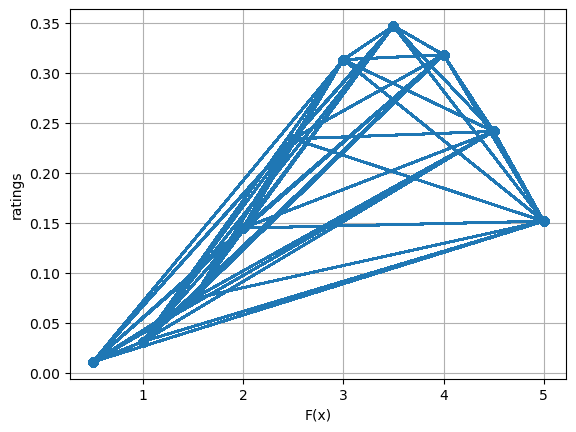

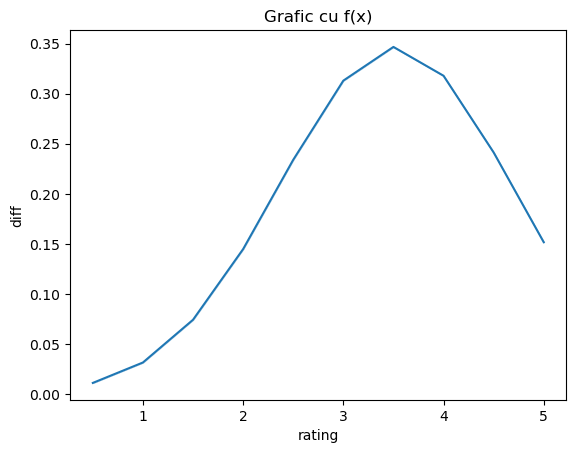

In [12]:
plt.plot(rat['rating'], rat['diff'],marker='o')

plt.xlabel("F(x)")
plt.ylabel("ratings")
plt.grid()
plt.show()

import seaborn as sns

sns.lineplot(data=rat, x="rating", y="diff")
plt.title("Grafic cu f(x)")
plt.show()

In [22]:
rat['nr_useri_mv']=rat.groupby("movieId").size()
# print(rat['nr_useri_mv'])
# am completat valorile lipsa cu 0
rat['nr_useri_mv']=rat['nr_useri_mv'].fillna(0)
print(rat['nr_useri_mv'])

0          NaN
1        207.0
2         91.0
3         30.0
4          8.0
         ...  
99995      NaN
99996      2.0
99997      NaN
99998      NaN
99999      NaN
Name: nr_useri_mv, Length: 100000, dtype: float64
0          0.0
1        207.0
2         91.0
3         30.0
4          8.0
         ...  
99995      0.0
99996      2.0
99997      0.0
99998      0.0
99999      0.0
Name: nr_useri_mv, Length: 100000, dtype: float64


In [23]:
# #medie useri
# #nr useri
nr_useri=rat['userId'].count()
print(nr_useri)

suma_useri=rat['nr_useri_mv'].sum()
print(suma_useri)
medie_us=suma_useri/nr_useri
print(medie_us)

#calculez minim pe coloana
min_us=rat['nr_useri_mv'].min()
print(min_us)
max_us=rat['nr_useri_mv'].max()
print(max_us)

100000
89606.0
0.89606
0.0
319.0


In [25]:
#voi calcula Z score pt coloana rating 

#calculez (xi-medie) rating 
rat['rat_op_medie']=rat["rating"]- medie_rat
# print(rat['rat_op_medie'])


varianta_tot=fractie*suma_dist_pt
# print(varianta_tot)

sigma=np.sqrt(varianta_tot)
# print(sigma)


# Z score rating

rat['zscore_rat']=rat['rat_op_medie']/sigma
print(rat['zscore_rat'])


0        0.447078
1       -2.350217
2       -1.417785
3        1.379509
4        1.379509
           ...   
99995   -0.485354
99996   -0.485354
99997   -0.951569
99998    0.447078
99999   -0.951569
Name: zscore_rat, Length: 100000, dtype: float64


In [36]:
#voi calcula Z score pentru coloana nr_useri_mv care reprezinta nr de voturi date/useri pentru fiecare film


# calculez (xi-medie) nr_useri_mv

rat['cent_use']=rat['nr_useri_mv']- medie_us
print(rat['cent_use'])

# nan_nr=rat['cent_use'].isnull().sum()
# print(nan_nr)
rat['cent_use_2']=(rat['nr_useri_mv']- medie_us)**2

# am completat valorile lipsa cu 0
# rat['cent_use']=rat['cent_use'].fillna(0)
# print(rat['cent_use'])

suma_usxi=rat['cent_use_2'].sum()
# print(suma_usxi)
fractie=1/nr_inre_ra
# print(fractie)

varianta_totus=suma_usxi*fractie
print(varianta_totus)

sigma_us=np.sqrt(varianta_totus)
print(sigma_us)


# rat['zscore_us']=rat['cent_use']/sigma_us


0         -0.89606
1        206.10394
2         90.10394
3         29.10394
4          7.10394
           ...    
99995     -0.89606
99996      1.10394
99997     -0.89606
99998     -0.89606
99999     -0.89606
Name: cent_use, Length: 100000, dtype: float64
55.62785647640003
7.458408441242677


In [38]:
# nr_useri_mv,rating
#calculez (xi-medie)(xi-medie) rating*nr_usr_mv 
rat['calcule']=rat['rat_op_medie']*rat['cent_use']
# print(rat['calcule'])

suma_cal=rat['calcule'].sum()
# print(suma_cal)


#calculez covarianta pentru cele 2 coloane

covarianta=suma_cal/suma_useri
print(covarianta)

covar_stand=fractie/(sigma_us*sigma)
print(covar_stand)

-0.10526820916010089
1.2501746843511299e-06


In [42]:
#normalizare (xi-min)/(max-xi) pt rating

rat['normalizare_rat']=((rat['rating']-min_rating)/(max_rating-rat['rating']))
# print(rat['normalizare_rat'])

#normalizare  (xi-min)/(max-xi) pt nr_useri_mv
rat['normalizare_nrusmv']= ((rat['nr_useri_mv']-min_us)/(max_us-rat['nr_useri_mv']))
print(rat['normalizare_nrusmv'])
# am completat valorile lipsa cu 0
# rat['normalizare_nrusmv']=rat['normalizare_nrusmv'].fillna(0)
# print(rat['normalizare_nrusmv'])

0        0.000000
1        1.848214
2        0.399123
3        0.103806
4        0.025723
           ...   
99995    0.000000
99996    0.006309
99997    0.000000
99998    0.000000
99999    0.000000
Name: normalizare_nrusmv, Length: 100000, dtype: float64


In [43]:
# print(rat['rat_op_medie'])

#Modul 
rat['modul_rat']=np.abs(rat['rat_op_medie'])
# print(rat['modul_rat'])
rat['modul_usmv']=np.abs(rat['calcule'])
print(rat['modul_usmv'])

0          0.429638
1        519.490133
2        137.005293
3         43.058552
4         10.510102
            ...    
99995      0.466422
99996      0.574628
99997      0.914452
99998      0.429638
99999      0.914452
Name: modul_usmv, Length: 100000, dtype: float64


In [45]:
# Centrare rating

rat['centrare_ratmv']=np.sqrt((rat['modul_rat'] **2)+(rat['modul_usmv']**2))
print(rat['centrare_ratmv'])

#caut maxim pe toate coloanele calculate 
max_modrat=rat['modul_rat'].max()
print(max_modrat)
max_modusmv=rat['modul_usmv'].max()
print(max_modusmv)
max_centr=rat['centrare_ratmv'].max()
print(max_centr)

r=max_modusmv
m=max_centr

baz_ort1=[1,0,0]
baz_ort2=[0,1,0]
baz_ort3=[0,0,1]

0          0.643805
1        519.496248
2        137.013731
3         43.083961
4         10.613721
            ...    
99995      0.698924
99996      0.775335
99997      1.370289
99998      0.643805
99999      1.370289
Name: centrare_ratmv, Length: 100000, dtype: float64
3.020525
519.4901333685
519.496248026391


In [49]:
#voi lua coloana timest si o voi prelucra astfel incat sa pot face categorii pe ani pt filme
from datetime import datetime
# dt_object = datetime.fromtimestamp(timestamp)
# pd.to_datetime(timestamps, unit='s') 
timest=rat["timestamp"]
rat['format_data']=pd.to_datetime(timest,unit='s')
# years = datetimes.dt.year
rat['year_mv']=rat['format_data'].dt.year
# print(rat['format_data'])
print(rat['year_mv'])

0       1999-12-03 19:24:37
1       1999-12-03 19:43:48
2       1999-11-22 00:36:16
3       1999-12-03 19:24:37
4       1999-11-22 00:00:58
                ...        
99995   2005-03-22 06:51:59
99996   2005-03-22 06:52:07
99997   2005-03-22 06:52:54
99998   2005-03-22 06:50:55
99999   2005-03-22 06:52:23
Name: format_data, Length: 100000, dtype: datetime64[ns]
0        1999
1        1999
2        1999
3        1999
4        1999
         ... 
99995    2005
99996    2005
99997    2005
99998    2005
99999    2005
Name: year_mv, Length: 100000, dtype: int64


In [56]:
#le pun pe 2 categorii impartite pe ani pana si dupa 2002
vechi=((rat['year_mv']) <=2002).to_numpy()
# print(vechi)
suma_mv_vechi=vechi.sum()
print(suma_mv_vechi)
noi=((rat['year_mv'])>2002).to_numpy()
suma_mv_noi=noi.sum()
print(suma_mv_noi)

mean_v_n=suma_mv_noi/nr_inre_ra
print(mean_v_n)

varianta_pt=mean_v_n*(1-mean_v_n)
print(varianta_pt)

varianta_s=np.sqrt(varianta_pt)
print(varianta_s)


23869
76131
0.76131
0.18171708389999996
0.42628286841016727


In [63]:
# le pun pe 4 categorii impartite pe ani 
#1999-2000foarte vechi
#2001-2002 vechi
#2003-2004 moderne
#2004-2005 noi
fvch=(((rat['year_mv'])>=1999 ) &(rat['year_mv'] <= 2000)).to_numpy()
# print(fvch)
vch=(((rat['year_mv'])>=2001 )& (rat['year_mv'] <= 2002)).to_numpy()
# print(vch)
mode=(((rat['year_mv'])>=2003 )& (rat['year_mv'] <= 2004)).to_numpy()
# print(mode)
noi=(((rat['year_mv'])>=1999 )& (rat['year_mv'] <= 2000)).to_numpy()
# print(noi)

# nr total pe categorie

nr_tot_fvch=fvch.sum()
print(nr_tot_fvch)
nr_tot_vch=vch.sum()
print(nr_tot_vch)
nr_tot_mode=mode.sum()
print(nr_tot_mode)
nr_tot_noi=noi.sum()
print(nr_tot_noi)

print("<-------->Probabilitate empirica<-------->\n")

pr_em_fvch=nr_tot_fvch/nr_inre_ra
print(pr_em_fvch)
pr_em_vch=nr_tot_vch/nr_inre_ra
print(pr_em_vch)
pr_em_mode=nr_tot_mode/nr_inre_ra
print(pr_em_mode)
pr_em_noi=nr_tot_noi/nr_inre_ra
print(pr_em_noi)

8179
8694
4990
8179
<-------->Probabilitate empirica<-------->

0.08179
0.08694
0.0499
0.08179


In [64]:
print("<-------->Masa de probabilitate<-------->\n")    

print(pr_em_fvch*(1-pr_em_fvch))
print(pr_em_vch*(1-pr_em_vch))
print(pr_em_mode*(1-pr_em_mode))
print(pr_em_noi*(1-pr_em_noi))
    

<-------->Masa de probabilitate<-------->

0.0751003959
0.0793814364
0.04740999
0.0751003959


In [66]:
print("<----------p*pT----------->")

a=pr_em_fvch*pr_em_fvch
# print(a)
b=pr_em_fvch*pr_em_vch
# print(b)
c=pr_em_fvch*pr_em_mode
# print(c)
d=pr_em_fvch*pr_em_noi
# print(d)
print(a,b,c,d)
print("--------------------")
e=pr_em_vch*pr_em_fvch
# print(e)
f=pr_em_vch*pr_em_vch
# print(f)
g=pr_em_vch*pr_em_mode
# print(g)
h=pr_em_vch*pr_em_noi
# print(h)
print(e,f,g,h)
print("---------------------")
i=pr_em_mode*pr_em_fvch
# print(i)
j=pr_em_mode*pr_em_vch
# print(j)
k=pr_em_mode*pr_em_mode
# print(k)
l=pr_em_mode*pr_em_noi
# print(l)
print(i,j,k,l)
print("---------------------")
m=pr_em_noi*pr_em_fvch
n=pr_em_noi*pr_em_vch
o=pr_em_noi*pr_em_mode
p=pr_em_noi*pr_em_noi
print(m,n,o,p)
print("<-------------Matricea P---------------->")
print(pr_em_fvch,0,0,0)
print(0,pr_em_vch,0,0)
print(0,0,round(pr_em_mode,3),0)
print(0,0,0,pr_em_noi)
print("<-------------Matricea de covarianta(p-p*pT)---------------->")
print(round(pr_em_fvch-a, 2),round(0-b,2),round(0-c,2),round(0-d,2))
print(round(0-e,2),round(pr_em_vch-f,2),round(0-g,2),round(0-h,2))
print(round(0-i,2),round(0-j,2),round(pr_em_mode-k,2),round(0-l,2))
print(round(0-m,2),round(0-n,2),round(0-o,2),round(pr_em_noi-p,2))

<----------p*pT----------->
0.0066896041000000005 0.0071108226 0.004081321 0.0066896041000000005
--------------------
0.0071108226 0.007558563600000001 0.004338306 0.0071108226
---------------------
0.004081321 0.004338306 0.00249001 0.004081321
---------------------
0.0066896041000000005 0.0071108226 0.004081321 0.0066896041000000005
<-------------Matricea P---------------->
0.08179 0 0 0
0 0.08694 0 0
0 0 0.05 0
0 0 0 0.08179
<-------------Matricea de covarianta(p-p*pT)---------------->
0.08 -0.01 -0.0 -0.01
-0.01 0.08 -0.0 -0.01
-0.0 -0.0 0.05 -0.0
-0.01 -0.01 -0.0 0.08
